In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_csv("Tata_Dataset.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10752 entries, 0 to 10751
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                10058 non-null  object 
 1   Place                9180 non-null   object 
 2   Job_type             3236 non-null   object 
 3   Department           7692 non-null   object 
 4   Date                 10064 non-null  object 
 5   Overall_rating       9998 non-null   float64
 6   work_life_balance    10695 non-null  float64
 7   skill_development    10684 non-null  float64
 8   salary_and_benefits  10648 non-null  float64
 9   job_security         10638 non-null  float64
 10  career_growth        10617 non-null  float64
 11  work_satisfaction    10597 non-null  float64
 12  Likes                8972 non-null   object 
 13  Dislikes             8602 non-null   object 
dtypes: float64(7), object(7)
memory usage: 1.1+ MB


In [ ]:
df.isna().sum()

,0
Title,694
Place,1572
Job_type,7516
Department,3060
Date,688
Overall_rating,754
work_life_balance,57
skill_development,68
salary_and_benefits,104
job_security,114


In [ ]:
df

,Title,Place,Job_type,Department,Date,Overall_rating,work_life_balance,skill_development,salary_and_benefits,job_security,career_growth,work_satisfaction,Likes,Dislikes
0,Senior Manager,"Pune, Maharashtra",Full Time,Engineering Department,4 Sep 2023,5.0,3.0,3.0,4.0,5.0,3.0,3.0,"Job security, Food",1. Processes are in place but not getting foll...
1,Customer Service Executive,"Mumbai, Maharashtra",Full Time,Retail Store Operations Department,2 Sep 2023,5.0,5.0,5.0,5.0,5.0,5.0,5.0,"We feel very good in this company, if any prob...",There is nothing about this company that we sh...
2,Senior Manager,Pune,Full Time,Production & Manufacturing Department,2 Sep 2023,4.0,5.0,2.0,2.0,4.0,3.0,1.0,Work life balance,Doesn’t have any proper policy regarding progr...
3,Data Entry Operator,"Jamshedpur, Jharkhand",Full Time,Production Department,2 Sep 2023,5.0,5.0,5.0,5.0,5.0,4.0,5.0,No any Competitor Entire World regarding our E...,No issues
4,Planning Engineer,"Sanand, Gujarat",Intern,Construction / Manufacturing Department,2 Sep 2023,4.0,1.0,1.0,3.0,4.0,1.0,2.0,job security and being a part of organization ...,people just dont work \nlazy going \nlower hie...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10747,Industrial Trainee,New Delhi,NaN,Production & Manufacturing Department,5 Apr 2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10748,Security Doorstep Services Loan Normally San...,Mumbai,NaN,Duliajan Dibrugarh Department,0 Oct 2017,NaN,4.0,5.0,5.0,4.0,5.0,4.0,Yes,Ok
10749,Collection Executive,Navimumbai,NaN,Lending Department,9 Sep 2017,NaN,5.0,5.0,NaN,NaN,NaN,NaN,Carrier growth,Salary
10750,Quality Control & Quality Assurance,Pune,NaN,NaN,8 Aug 2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Tata motar,mahidra,",Yes


In [ ]:
title_counts = df['Title'].value_counts()
print(df['Title'].nunique())
print(df['Department'].nunique())
print("Different Titles and their Counts:\n", title_counts)

3755
1675
Different Titles and their Counts:
 Title
Senior Manager              523
Trainee                     167
Diploma Engineer Trainee    155
Sales Executive             152
Quality Engineer            105
                           ... 
Asst Accounts                 1
Electrician, Fitter           1
Hr Specialist                 1
Insurance Head                1
Ahmdabad                      1
Name: count, Length: 3755, dtype: int64




#### Since There are a lot of roles so let us remove it and also other unnecessary stuff.

In [ ]:
df = df.drop(['Title', 'Department', 'Date', 'Job_type'], axis=1)

In [ ]:
df = df.drop(['Place'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10752 entries, 0 to 10751
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Overall_rating       9998 non-null   float64
 1   work_life_balance    10695 non-null  float64
 2   skill_development    10684 non-null  float64
 3   salary_and_benefits  10648 non-null  float64
 4   job_security         10638 non-null  float64
 5   career_growth        10617 non-null  float64
 6   work_satisfaction    10597 non-null  float64
 7   Likes                8972 non-null   object 
 8   Dislikes             8602 non-null   object 
dtypes: float64(7), object(2)
memory usage: 756.1+ KB


In [ ]:
import plotly.express as px

for column in df.columns[:-2]:
  fig = px.histogram(df, x=column)
  fig.update_layout(bargap=0.2)
  fig.show()


In [ ]:
import plotly.express as px

for column in df.columns[:-2]:
  fig = px.violin(df, x=column)
  fig.show()


In [ ]:
import pandas as pd
import numpy as np
numeric_df = df.select_dtypes(include=np.number)
categorical_df = df.select_dtypes(exclude=np.number)

categorical_df = pd.concat([categorical_df, df.iloc[:, -2:]], axis=1)

print("Numeric DataFrame:")
print(numeric_df.info())
print("\nCategorical DataFrame:")
print(categorical_df.info())

Numeric DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10752 entries, 0 to 10751
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Overall_rating       9998 non-null   float64
 1   work_life_balance    10695 non-null  float64
 2   skill_development    10684 non-null  float64
 3   salary_and_benefits  10648 non-null  float64
 4   job_security         10638 non-null  float64
 5   career_growth        10617 non-null  float64
 6   work_satisfaction    10597 non-null  float64
dtypes: float64(7)
memory usage: 588.1 KB
None

Categorical DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10752 entries, 0 to 10751
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Likes     8972 non-null   object
 1   Dislikes  8602 non-null   object
 2   Likes     8972 non-null   object
 3   Dislikes  8602 non-null   object
dtypes: object(4

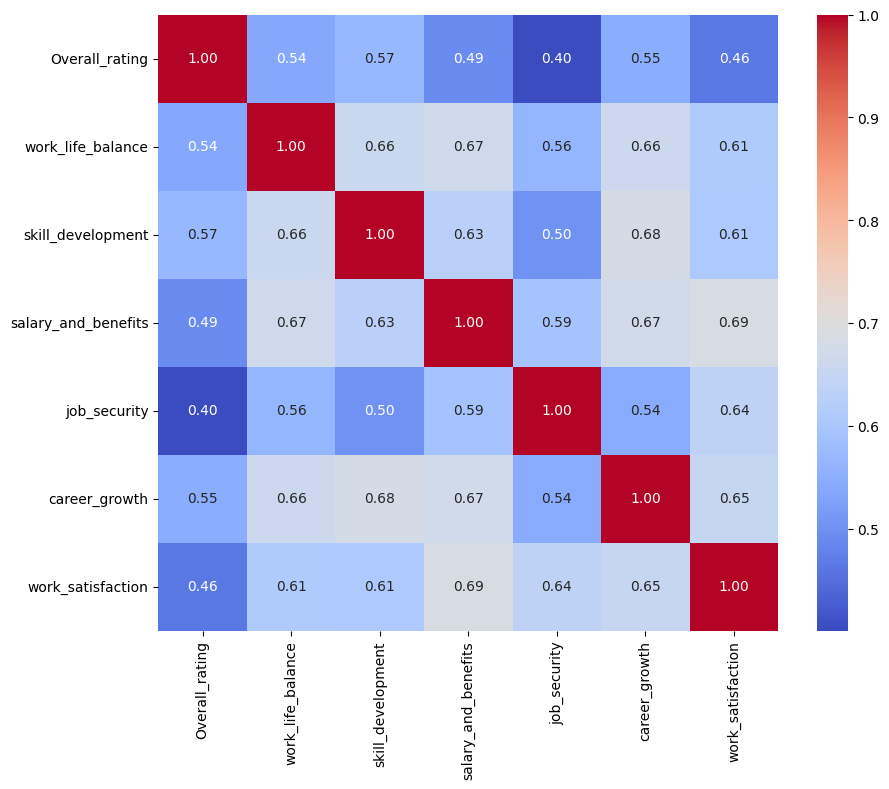

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [ ]:
import numpy as np

for column in numeric_df.columns:
  numeric_df[column] = np.exp(numeric_df[column])

print(numeric_df)


       Overall_rating  work_life_balance  skill_development  \
0          148.413159          20.085537          20.085537   
1          148.413159         148.413159         148.413159   
2           54.598150         148.413159           7.389056   
3          148.413159         148.413159         148.413159   
4           54.598150           2.718282           2.718282   
...               ...                ...                ...   
10747             NaN                NaN                NaN   
10748             NaN          54.598150         148.413159   
10749             NaN         148.413159         148.413159   
10750             NaN                NaN                NaN   
10751             NaN                NaN                NaN   

       salary_and_benefits  job_security  career_growth  work_satisfaction  
0                54.598150    148.413159      20.085537          20.085537  
1               148.413159    148.413159     148.413159         148.413159  
2           

In [ ]:
numeric_df.isna().sum()

,0
Overall_rating,754
work_life_balance,57
skill_development,68
salary_and_benefits,104
job_security,114
career_growth,135
work_satisfaction,155


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
numeric_df[:] = imputer.fit_transform(numeric_df)

In [ ]:
numeric_df.isna().sum()

,0
Overall_rating,0
work_life_balance,0
skill_development,0
salary_and_benefits,0
job_security,0
career_growth,0
work_satisfaction,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numeric_df[:] = scaler.fit_transform(numeric_df)
print(numeric_df)

       Overall_rating  work_life_balance  skill_development  \
0            1.000000           0.119203           0.119203   
1            1.000000           1.000000           1.000000   
2            0.356086           1.000000           0.032059   
3            1.000000           1.000000           1.000000   
4            0.356086           0.000000           0.000000   
...               ...                ...                ...   
10747        1.000000           0.356086           0.356086   
10748        1.000000           0.356086           1.000000   
10749        1.000000           1.000000           1.000000   
10750        1.000000           0.356086           0.356086   
10751        1.000000           0.356086           0.356086   

       salary_and_benefits  job_security  career_growth  work_satisfaction  
0                 0.356086      1.000000       0.119203           0.119203  
1                 1.000000      1.000000       1.000000           1.000000  
2           

In [ ]:
numeric_df.describe()

,Overall_rating,work_life_balance,skill_development,salary_and_benefits,job_security,career_growth,work_satisfaction
count,10752.000000,10752.000000,10752.000000,10752.000000,10752.000000,10752.000000,10752.000000
mean,0.668165,0.558314,0.595350,0.503879,0.571506,0.614781,0.486414
std,0.393399,0.407355,0.402949,0.407597,0.418628,0.406985,0.414727
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.356086,0.119203,0.356086,0.119203,0.119203,0.356086,0.119203
50%,1.000000,0.356086,0.356086,0.356086,0.356086,1.000000,0.356086
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
betray_df = pd.DataFrame({
    'Greed': numeric_df['salary_and_benefits'],
    'Loyalty': numeric_df['Overall_rating'],
    'Respect': numeric_df['career_growth'],
    'Temptation': numeric_df['work_life_balance'],
    'Trust': numeric_df['job_security'],
    'Satsifaction': numeric_df['work_satisfaction'],
    'Ambition': numeric_df['skill_development']
})

betray_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10752 entries, 0 to 10751
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Greed         10752 non-null  float64
 1   Loyalty       10752 non-null  float64
 2   Respect       10752 non-null  float64
 3   Temptation    10752 non-null  float64
 4   Trust         10752 non-null  float64
 5   Satsifaction  10752 non-null  float64
 6   Ambition      10752 non-null  float64
dtypes: float64(7)
memory usage: 588.1 KB


In [ ]:
column_description = {
    'Greed': 'Greed (Financial Temptation) refering to salary and benifits',
    'Loyalty': 'Loyalty to the Clan (Commitment) refering to overall rating',
    'Respect': 'Rank and Perceived Respect refering to career growth',
    'Temptation': 'Shows work-life balance, representing the level of temptation to betray.',
    'Trust': 'Trust On Current Government refering to job security',
    'Satisfaction': 'Satisfaction With Current Leadership refering to work satisfaction',
    'Ambition': 'Personal Ambition refering to skill developement'
}

In [ ]:
betray_df['Greed'] = 1-betray_df['Greed']
betray_df['Temptation'] = 1-betray_df['Temptation']
print(betray_df)

          Greed   Loyalty   Respect  Temptation     Trust  Satsifaction  \
0      0.643914  1.000000  0.119203    0.880797  1.000000      0.119203   
1      0.000000  1.000000  1.000000    0.000000  1.000000      1.000000   
2      0.967941  0.356086  0.119203    0.000000  0.356086      0.000000   
3      0.000000  1.000000  0.356086    0.000000  1.000000      1.000000   
4      0.880797  0.356086  0.000000    1.000000  0.356086      0.032059   
...         ...       ...       ...         ...       ...           ...   
10747  0.643914  1.000000  1.000000    0.643914  0.356086      0.356086   
10748  0.000000  1.000000  1.000000    0.643914  0.356086      0.356086   
10749  0.643914  1.000000  1.000000    0.000000  0.356086      0.356086   
10750  0.643914  1.000000  1.000000    0.643914  0.356086      0.356086   
10751  0.643914  1.000000  1.000000    0.643914  0.356086      0.356086   

       Ambition  
0      0.119203  
1      1.000000  
2      0.032059  
3      1.000000  
4      0.